In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv(r'C:/Users/FSJDA/Desktop/Pythonbasics/term_deposit.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe()
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

<AxesSubplot:>

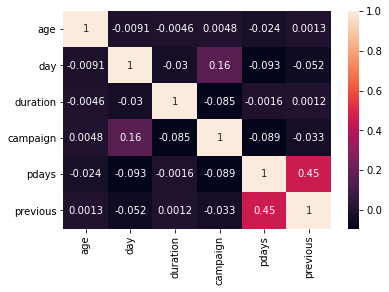

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
df['education'].value_counts()
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# convert categorical target to numerical
df['y'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# show the head of df['class']
df['y'].head()
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [7]:
# X and y
X = df.drop(columns=['y'])
y= df['y']

In [8]:
#encode the  cateorical features/prdictors in data
X=pd.get_dummies(data=X,prefix_sep='_',drop_first=True)



In [9]:
X.shape

(45211, 41)

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [12]:
RF1_clf = RandomForestClassifier(n_estimators=501,oob_score=True,random_state=101)

In [13]:
RF1_clf=RF1_clf.fit(X_train,y_train)

In [14]:
print(RF1_clf.oob_score_)

0.9062470376338989


In [15]:
# performing predictions on the test dataset 
y_pred = RF1_clf.predict(X_test) 
#confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,11642,339
1,932,651


In [16]:
# metrics are used to find accuracy or error 
from sklearn import metrics   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 

ACCURACY OF THE MODEL:  0.9062960778531407


In [20]:
### variable importance
feature_importances = pd.DataFrame(RF1_clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.301982
age,0.114339
day,0.105321
poutcome_success,0.052799
campaign,0.047216
pdays,0.045223
previous,0.023123
housing_yes,0.023083
education_secondary,0.014536
marital_married,0.013907


C:\Users\FSJDA\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(-0.05, 1.05)

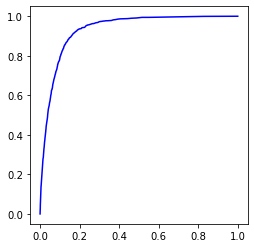

In [35]:
y_pred_prob=RF1_clf.predict_proba(X_test)
fpr, tpr, threshold= metrics.roc_curve(y_test, y_pred_prob[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fpr, tpr, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [36]:
AUC= metrics.auc(fpr,tpr)
print(AUC)

0.9320942619033092


## Cross Validation

In [21]:
# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

In [22]:
# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()


In [25]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, X, y, scoring='roc_auc', cv=5)

In [26]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.608722827600958


In [29]:

# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier()

In [45]:
from sklearn.metrics import accuracy_score
y_pred_xgb = xgb_cl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 90.59%


In [40]:
# predict on the test set
y_pred_prob_xgb =xgb_cl.predict_proba(X_test) 

C:\Users\FSJDA\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


(-0.05, 1.05)

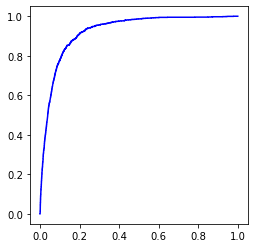

In [41]:

fpr1, tpr1, threshold1= metrics.roc_curve(y_test, y_pred_prob_xgb[:,1]) # [:, 1]: the second value is the probability for 1
#pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fpr1, tpr1, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [42]:
AUC= metrics.auc(fpr,tpr)
print(AUC)

0.9320942619033092


### Over sampling imbalanced dataset

In [50]:
import imblearn

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import RandomOverSampler

C:\Users\FSJDA\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')



34633 new random picked points


In [53]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

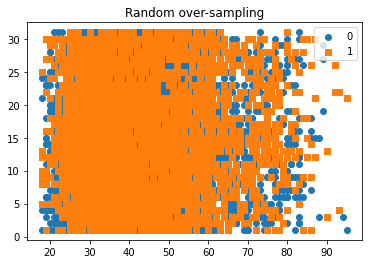

In [54]:


plot_2d_space(X_ros, y_ros, 'Random over-sampling')

## Random Forest Over resampled data

In [55]:
X_rosTrain, X_rostest, y_rostrain, y_rostest = train_test_split(X_ros, y_ros, test_size=0.3, random_state=11)

In [56]:
RFros_clf=RF1_clf.fit(X_rosTrain,y_rostrain)

In [58]:
# performing predictions on the test dataset 
 = RF1_clf.predict(X_rostest) 
#confusion matrix
pd.crosstab(y_rostest,y_pred_ros)

col_0,0,1
row_0,,
0,11229,861
1,20,11844


In [60]:
# metrics are used to find accuracy or error 
from sklearn import metrics   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_rostest, y_pred_ros)) 

ACCURACY OF THE MODEL:  0.9632211739166736


C:\Users\FSJDA\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(-0.05, 1.05)

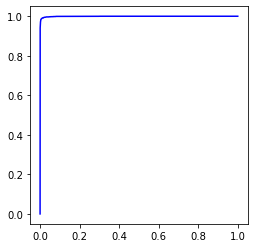

In [61]:
pred_prob=RF1_clf.predict_proba(X_rostest)
fp, tp, thr= metrics.roc_curve(y_rostest, pred_prob[:,1]) #pass the actual test DV and 
#predicted probability (only P(y)=1)
#**********DRAW ROC CURVE**************
plt.plot(fp, tp, label='ROC curve', color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [62]:
AUC= metrics.auc(fp,tp)
print("ROC-AUC: ",AUC)

ROC-AUC:  0.999457948980087
